/tmp/ipython-input-1962508202.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', period='1y')
[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-01-10  235.783630  239.078725  231.950958  238.929391  61710900
2025-01-13  233.344650  233.613439  228.685728  232.478572  49630700
2025-01-14  232.229675  235.056885  231.423325  233.693058  39435300
2025-01-15  236.798996  237.884100  233.374482  233.583543  39832000
2025-01-16  227.232285  236.938386  227.003324  236.281370  71759100
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2025-01-10 to 2026-01-08
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   250 non-null    float64
 1   (High, AAPL)    250 non-null    float64
 2   (Low, AAPL)     250 non-null    float64
 3   (Open, AAPL)    250 non-null    float64
 4   (Volume, AAPL)  250 non-null    int64  
dtypes: fl

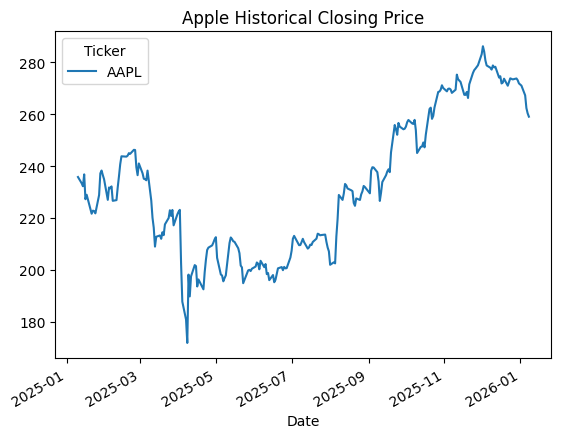

Mean Squared Error: 2.5942220164962


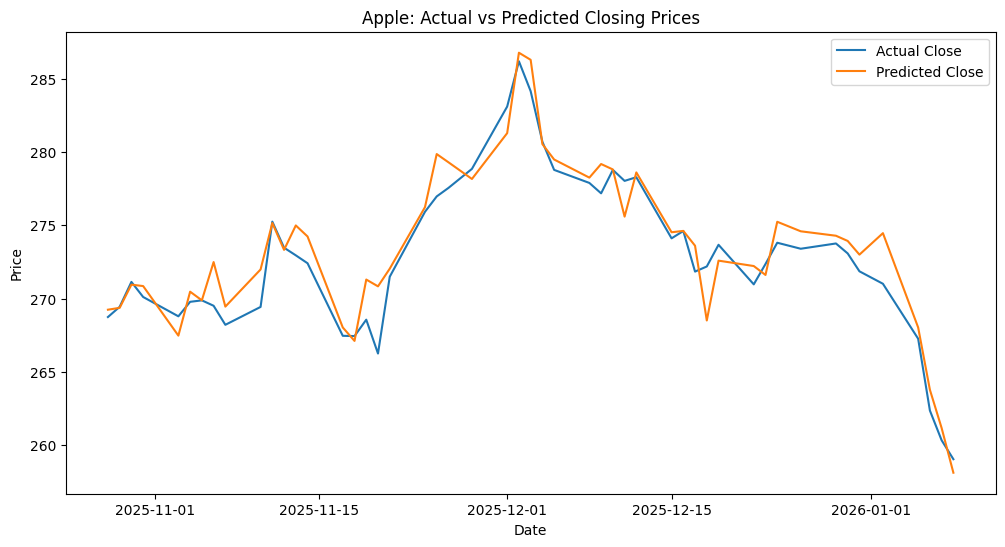

In [ ]:
 # Task 2: Predict Future Stock Prices (Short-Term)
#Goal: Predict Apple’s next-day closing price using historical stock data

import yfinance as yf

# Download last 1 year of Apple data
data = yf.download('AAPL', period='1y')

# Check the first few rows
print(data.head())

# Explore the data
data.info()  # see columns
data.describe()  # see statics
import matplotlib.pyplot as plt
data['Close'].plot(title='Apple Historical Closing Price')
plt.show()
# prepare the data

from sklearn.model_selection import train_test_split

X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)
# Train the Model
# usng Regresssion
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)  # teach computer

# we  Use Random Forest for better accuracy
from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)
# predict and evalute

y_pred = model.predict(X_test)

#Evaluate performance using Mean Squared Error (MSE):

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
 # Plot Actual vs Predicted

 plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Close')
plt.plot(y_test.index, y_pred, label='Predicted Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple: Actual vs Predicted Closing Prices')
plt.legend()
plt.show()




 # Task 2: Predict Future Stock Prices (Short-Term)
 **#Goal**: ***Predict Apple’s next-day closing price using historical stock data***

 **import yfinance as yf**

 This imports the yfinance library, which lets you download stock data directly from Yahoo Finance.

Without this, Python cannot fetch Apple’s historical prices.
*italicized text*
# Download last 1 year of Apple data

**data = yf.download('AAPL', period='1y')**

Downloads Apple (AAPL) stock data for the last 1 year.

data becomes a table (DataFrame) with columns like Open, High, Low, Close, and Volume for each day. *italicized text*

# Check the first few rows

**print(data.head())**

Columns: Open, High, Low, Close, Volume

We will use Open, High, Low, Volume as features, Close as target

# Explore the data

data.info()  # see columns
data.describe()  # see statics
import matplotlib.pyplot as plt
data['Close'].plot(title='Apple Historical Closing Price')
plt.show()

 this imports the library matplotlib for making graphs.
Plots the closing price of Apple over time.

plt.show() displays the graph so you can see trends and patterns.

# prepare the data

from sklearn.model_selection import train_test_split

X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
  
)
Splits data: 80% train, 20% test.

shuffle=False keeps the time order intact because stock prices are sequential.

# Train the Model
# usng Regresssion

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)  # teach computer

Trains the model using the training data.

The model learns how features (Open, High, Low, Volume) relate to the Close price

# we  Use Random Forest for better accuracy
from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)
# predict and evalute

y_pred = model.predict(X_test)

#Evaluate performance using Mean Squared Error (MSE):

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Imports a metric to check how wrong the model is.
Calculates Mean Squared Error (MSE) between actual and predicted prices.

Lower MSE = model predictions are closer to reality.
 # Plot Actual vs Predicted

 plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Close')
plt.plot(y_test.index, y_pred, label='Predicted Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple: Actual vs Predicted Closing Prices')
plt.legend()
plt.show()

Blue line = Actual Close
Orange line = Predicted Close

Observation:

The predicted line closely follows the actual closing prices for most days.

There are small deviations — sometimes the model overestimates, sometimes underestimates.

The overall trend (up and down movements) is captured well.

Mean Squared Error (MSE = 2.59)

A low MSE like this indicates the model’s predictions are reasonably close to actual values.

The smaller the MSE, the better the predictions match reality

 #CONCLUSION

We successfully loaded and explored Apple’s historical stock data for the past year.
Using Open, High, Low, and Volume as features, we trained a linear regression model to predict next-day closing prices.
The model captured the overall trends accurately, with a low mean squared error, indicating reliable short-term predictions.
This approach demonstrates that historical stock features can effectively inform near-future price movements, though more advanced models could further improve accuracy
